In [385]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd

In [386]:
covid19 = pd.read_csv('corona.csv')

In [387]:
covid19

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1081,2.0,2/25/2020,NaN,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,NaN,24.0,NaN,...,0,NaN,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...,NaN,NaN,NaN,NaN,NaN,NaN
1081,1082,1.0,2/24/2020,NaN,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,NaN,35.0,NaN,...,0,NaN,Fox News,https://www.foxnews.com/health/afghanistan-fir...,NaN,NaN,NaN,NaN,NaN,NaN
1082,1083,1.0,2/26/2020,NaN,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,NaN,NaN,...,0,NaN,South China Morning Post,https://www.scmp.com/news/china/society/articl...,NaN,NaN,NaN,NaN,NaN,NaN
1083,1084,1.0,2/25/2020,NaN,new COVID-19 patient confirmed in Croatia: mal...,Croatia,Croatia,male,NaN,NaN,...,0,NaN,Reuters,https://www.reuters.com/article/us-croatia-cor...,NaN,NaN,NaN,NaN,NaN,NaN


In [388]:
covid19.describe()

,id,case_in_country,Unnamed: 3,age,If_onset_approximated,visiting Wuhan,from Wuhan,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
count,1085.000000,888.000000,0.0,843.000000,560.000000,1085.000000,1081.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,543.000000,48.841216,NaN,49.483689,0.042857,0.176959,0.144311,NaN,NaN,NaN,NaN,NaN,NaN
std,313.356825,78.853528,NaN,18.255334,0.202716,0.381810,0.351567,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,0.250000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,272.000000,11.000000,NaN,35.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,543.000000,28.000000,NaN,51.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,814.000000,67.250000,NaN,64.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,1085.000000,1443.000000,NaN,96.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [389]:
def missing_values_table(covid19): 
    mis_val = covid19.isnull().sum()
    mis_val_percent = 100 * covid19.isnull().sum()/len(covid19)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    return mis_val_table_ren_columns

In [390]:
missing_values_table(covid19)

,Missing Values,% of Total Values
id,0,0.000000
case_in_country,197,18.156682
reporting date,1,0.092166
Unnamed: 3,1085,100.000000
summary,5,0.460829
location,0,0.000000
country,0,0.000000
gender,183,16.866359
age,242,22.304147
symptom_onset,522,48.110599


In [391]:
covid19 = covid19.drop(covid19.columns[covid19.apply(lambda col: col.isnull().sum()/len(covid19) > 0.75)], axis=1)

In [392]:
covid19

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_end,visiting Wuhan,from Wuhan,death,recovered,source,link
0,1,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,0.0,01/11/20,01/04/20,1,0.0,0,0,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,2,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,01/12/20,0,1.0,0,0,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
2,3,NaN,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,0.0,1/17/2020,01/03/20,0,1.0,0,0,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
3,4,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,NaN,1/19/2020,NaN,1,0.0,0,0,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
4,5,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,NaN,1/14/2020,NaN,0,0.0,0,0,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1081,2.0,2/25/2020,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,NaN,24.0,NaN,NaN,NaN,NaN,0,0.0,0,0,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...
1081,1082,1.0,2/24/2020,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,NaN,35.0,NaN,NaN,NaN,NaN,0,0.0,0,0,Fox News,https://www.foxnews.com/health/afghanistan-fir...
1082,1083,1.0,2/26/2020,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,NaN,NaN,NaN,NaN,2/17/2020,0,0.0,0,0,South China Morning Post,https://www.scmp.com/news/china/society/articl...
1083,1084,1.0,2/25/2020,new COVID-19 patient confirmed in Croatia: mal...,Croatia,Croatia,male,NaN,NaN,NaN,NaN,2/21/2020,0,0.0,0,0,Reuters,https://www.reuters.com/article/us-croatia-cor...


In [393]:
covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 18 columns):
id                       1085 non-null int64
case_in_country          888 non-null float64
reporting date           1084 non-null object
summary                  1080 non-null object
location                 1085 non-null object
country                  1085 non-null object
gender                   902 non-null object
age                      843 non-null float64
symptom_onset            563 non-null object
If_onset_approximated    560 non-null float64
hosp_visit_date          507 non-null object
exposure_end             341 non-null object
visiting Wuhan           1085 non-null int64
from Wuhan               1081 non-null float64
death                    1085 non-null object
recovered                1085 non-null object
source                   1085 non-null object
link                     1085 non-null object
dtypes: float64(4), int64(2), object(12)
memory usage: 152.7+ KB


In [394]:
most_frequent = covid19.groupby(by=['country']).sum()
most_frequent

,id,case_in_country,age,If_onset_approximated,visiting Wuhan,from Wuhan
country,,,,,,
Afghanistan,1082,1.0,35.00,0.0,0,0.0
Algeria,1083,1.0,0.00,0.0,0,0.0
Australia,11610,120.0,630.00,1.0,6,8.0
Austria,2161,3.0,48.00,0.0,0,0.0
Bahrain,18207,153.0,0.00,0.0,0,0.0
Belgium,1032,1.0,0.00,0.0,1,0.0
Cambodia,794,1.0,60.00,0.0,0,1.0
Canada,9450,78.0,511.00,1.0,5,2.0
China,19503,0.0,9310.00,0.0,85,82.0


In [395]:
most_frequent.nlargest(5,'case_in_country')

,id,case_in_country,age,If_onset_approximated,visiting Wuhan,from Wuhan
country,,,,,,
Japan,62985,18145.0,10316.0,0.0,12,12.0
South Korea,68457,10477.0,4383.0,1.0,9,2.0
Hong Kong,86245,4434.0,5215.0,3.0,5,6.0
Singapore,46221,4371.0,3916.5,0.0,13,10.0
Germany,44415,1485.0,563.0,0.0,2,0.0


In [396]:
for case_in_country in covid19:
    if covid19['case_in_country'].isnull().any():
        if(case_in_country in covid19):
            covid19['case_in_country']=covid19['case_in_country'].fillna(covid19['case_in_country'].mode()[0])
        else:
            covid19['case_in_country']=covid19['case_in_country'].fillna(covid19['case_in_country'].mean)

In [397]:
del covid19['If_onset_approximated']
covid19

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,hosp_visit_date,exposure_end,visiting Wuhan,from Wuhan,death,recovered,source,link
0,1,1.0,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,01/11/20,01/04/20,1,0.0,0,0,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,2,1.0,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,1/15/2020,01/12/20,0,1.0,0,0,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
2,3,1.0,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,1/17/2020,01/03/20,0,1.0,0,0,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
3,4,1.0,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,1/19/2020,NaN,1,0.0,0,0,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
4,5,1.0,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,1/14/2020,NaN,0,0.0,0,0,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1081,2.0,2/25/2020,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,NaN,24.0,NaN,NaN,NaN,0,0.0,0,0,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...
1081,1082,1.0,2/24/2020,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,NaN,35.0,NaN,NaN,NaN,0,0.0,0,0,Fox News,https://www.foxnews.com/health/afghanistan-fir...
1082,1083,1.0,2/26/2020,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,NaN,NaN,NaN,2/17/2020,0,0.0,0,0,South China Morning Post,https://www.scmp.com/news/china/society/articl...
1083,1084,1.0,2/25/2020,new COVID-19 patient confirmed in Croatia: mal...,Croatia,Croatia,male,NaN,NaN,NaN,2/21/2020,0,0.0,0,0,Reuters,https://www.reuters.com/article/us-croatia-cor...


In [398]:
for gender in covid19:
    if covid19['gender'].isnull().any():
        if(gender in covid19):
            covid19['gender']=covid19['gender'].fillna(covid19['gender'].mode()[0])
        else:
            covid19['gender']=covid19['gender'].fillna(covid19['gender'].mean)
for age in covid19:
    if covid19['age'].isnull().any():
        covid19['age']=covid19['age'].fillna(covid19['age'].mode()[0])
    else:
        covid19['age']=covid19['age'].fillna(covid19['age'].mean)

In [399]:
covid19

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,hosp_visit_date,exposure_end,visiting Wuhan,from Wuhan,death,recovered,source,link
0,1,1.0,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,01/11/20,01/04/20,1,0.0,0,0,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,2,1.0,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,1/15/2020,01/12/20,0,1.0,0,0,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
2,3,1.0,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,1/17/2020,01/03/20,0,1.0,0,0,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
3,4,1.0,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,1/19/2020,NaN,1,0.0,0,0,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
4,5,1.0,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,1/14/2020,NaN,0,0.0,0,0,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1081,2.0,2/25/2020,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,male,24.0,NaN,NaN,NaN,0,0.0,0,0,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...
1081,1082,1.0,2/24/2020,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,male,35.0,NaN,NaN,NaN,0,0.0,0,0,Fox News,https://www.foxnews.com/health/afghanistan-fir...
1082,1083,1.0,2/26/2020,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,55.0,NaN,NaN,2/17/2020,0,0.0,0,0,South China Morning Post,https://www.scmp.com/news/china/society/articl...
1083,1084,1.0,2/25/2020,new COVID-19 patient confirmed in Croatia: mal...,Croatia,Croatia,male,55.0,NaN,NaN,2/21/2020,0,0.0,0,0,Reuters,https://www.reuters.com/article/us-croatia-cor...


In [400]:
covid19 = covid19.set_index('reporting date')
covid19

,id,case_in_country,summary,location,country,gender,age,symptom_onset,hosp_visit_date,exposure_end,visiting Wuhan,from Wuhan,death,recovered,source,link
reporting date,,,,,,,,,,,,,,,,
1/20/2020,1,1.0,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,01/11/20,01/04/20,1,0.0,0,0,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1/20/2020,2,1.0,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,1/15/2020,01/12/20,0,1.0,0,0,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
1/21/2020,3,1.0,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,1/17/2020,01/03/20,0,1.0,0,0,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
1/21/2020,4,1.0,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,1/19/2020,NaN,1,0.0,0,0,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
1/21/2020,5,1.0,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,1/14/2020,NaN,0,0.0,0,0,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2/25/2020,1081,2.0,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,male,24.0,NaN,NaN,NaN,0,0.0,0,0,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...
2/24/2020,1082,1.0,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,male,35.0,NaN,NaN,NaN,0,0.0,0,0,Fox News,https://www.foxnews.com/health/afghanistan-fir...
2/26/2020,1083,1.0,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,55.0,NaN,NaN,2/17/2020,0,0.0,0,0,South China Morning Post,https://www.scmp.com/news/china/society/articl...


In [401]:
covid19['symptom_onset'] = pd.to_datetime(covid19['symptom_onset'])
covid19['hosp_visit_date'] = pd.to_datetime(covid19['hosp_visit_date'])
covid19['exposure_end'] = pd.to_datetime(covid19['exposure_end'])

In [402]:
covid19.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1085 entries, 1/20/2020 to 2/25/2020
Data columns (total 16 columns):
id                 1085 non-null int64
case_in_country    1085 non-null float64
summary            1080 non-null object
location           1085 non-null object
country            1085 non-null object
gender             1085 non-null object
age                1085 non-null float64
symptom_onset      563 non-null datetime64[ns]
hosp_visit_date    507 non-null datetime64[ns]
exposure_end       341 non-null datetime64[ns]
visiting Wuhan     1085 non-null int64
from Wuhan         1081 non-null float64
death              1085 non-null object
recovered          1085 non-null object
source             1085 non-null object
link               1085 non-null object
dtypes: datetime64[ns](3), float64(3), int64(2), object(8)
memory usage: 144.1+ KB


In [403]:
covid19['death'] = pd.to_numeric(covid19['death'],errors='coerce')
covid19['recovered'] = pd.to_numeric(covid19['recovered'],errors='coerce')
covid19.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1085 entries, 1/20/2020 to 2/25/2020
Data columns (total 16 columns):
id                 1085 non-null int64
case_in_country    1085 non-null float64
summary            1080 non-null object
location           1085 non-null object
country            1085 non-null object
gender             1085 non-null object
age                1085 non-null float64
symptom_onset      563 non-null datetime64[ns]
hosp_visit_date    507 non-null datetime64[ns]
exposure_end       341 non-null datetime64[ns]
visiting Wuhan     1085 non-null int64
from Wuhan         1081 non-null float64
death              1064 non-null float64
recovered          933 non-null float64
source             1085 non-null object
link               1085 non-null object
dtypes: datetime64[ns](3), float64(5), int64(2), object(6)
memory usage: 144.1+ KB


In [404]:
for death in covid19:
    if covid19['death'].isnull().any():
        covid19['death']=covid19['death'].fillna(covid19['death'].mode()[0])
    else:
        covid19['death']=covid19['death'].fillna(covid19['death'].mean)
for recovered in covid19:
    if covid19['recovered'].isnull().any():
        covid19['recovered']=covid19['recovered'].fillna(covid19['recovered'].mode()[0])
    else:
        covid19['recovered']=covid19['recovered'].fillna(covid19['recovered'].mean)
covid19.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1085 entries, 1/20/2020 to 2/25/2020
Data columns (total 16 columns):
id                 1085 non-null int64
case_in_country    1085 non-null float64
summary            1080 non-null object
location           1085 non-null object
country            1085 non-null object
gender             1085 non-null object
age                1085 non-null float64
symptom_onset      563 non-null datetime64[ns]
hosp_visit_date    507 non-null datetime64[ns]
exposure_end       341 non-null datetime64[ns]
visiting Wuhan     1085 non-null int64
from Wuhan         1081 non-null float64
death              1085 non-null float64
recovered          1085 non-null float64
source             1085 non-null object
link               1085 non-null object
dtypes: datetime64[ns](3), float64(5), int64(2), object(6)
memory usage: 144.1+ KB


In [405]:
covid19.describe()

,id,case_in_country,age,visiting Wuhan,from Wuhan,death,recovered
count,1085.000000,1085.000000,1085.000000,1085.000000,1081.000000,1085.000000,1085.000000
mean,543.000000,40.154839,50.714055,0.176959,0.144311,0.038710,0.006452
std,313.356825,73.677028,16.252281,0.381810,0.351567,0.192991,0.080099
min,1.000000,1.000000,0.250000,0.000000,0.000000,0.000000,0.000000
25%,272.000000,3.000000,39.000000,0.000000,0.000000,0.000000,0.000000
50%,543.000000,18.000000,55.000000,0.000000,0.000000,0.000000,0.000000
75%,814.000000,55.000000,58.000000,0.000000,0.000000,0.000000,0.000000
max,1085.000000,1443.000000,96.000000,1.000000,1.000000,1.000000,1.000000


In [406]:
covid19.drop('death' , axis = 1 , inplace = True)
covid19.drop('recovered' , axis = 1 , inplace = True)

In [407]:
covid19

,id,case_in_country,summary,location,country,gender,age,symptom_onset,hosp_visit_date,exposure_end,visiting Wuhan,from Wuhan,source,link
reporting date,,,,,,,,,,,,,,
1/20/2020,1,1.0,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,2020-01-03,2020-01-11,2020-01-04,1,0.0,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1/20/2020,2,1.0,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,2020-01-15,2020-01-15,2020-01-12,0,1.0,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
1/21/2020,3,1.0,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,2020-01-04,2020-01-17,2020-01-03,0,1.0,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
1/21/2020,4,1.0,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaT,2020-01-19,NaT,1,0.0,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
1/21/2020,5,1.0,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaT,2020-01-14,NaT,0,0.0,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2/25/2020,1081,2.0,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,male,24.0,NaT,NaT,NaT,0,0.0,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...
2/24/2020,1082,1.0,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,male,35.0,NaT,NaT,NaT,0,0.0,Fox News,https://www.foxnews.com/health/afghanistan-fir...
2/26/2020,1083,1.0,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,55.0,NaT,NaT,2020-02-17,0,0.0,South China Morning Post,https://www.scmp.com/news/china/society/articl...


In [408]:
covid19['Difference'] = covid19['symptom_onset'].sub(covid19['hosp_visit_date'], axis=0)
covid19['Difference'].mean()

Timedelta('-3 days +05:43:09.755011')

In [409]:
covid19['Difference2'] = covid19['hosp_visit_date'].sub(covid19['exposure_end'], axis=0)
covid19['Difference2'].mean()

Timedelta('4 days 10:24:45.714285')

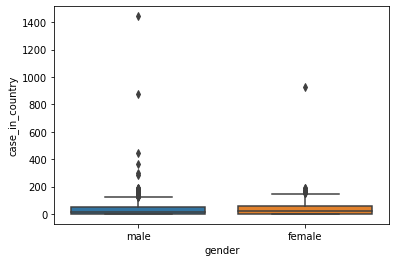

In [411]:
sns.boxplot(x="gender", y="case_in_country",data=covid19)